## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import warnings
warnings.simplefilter("ignore", UserWarning)

## Functions

In [2]:
def create_heatmap(threshold = None):
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]#, "PR"] # Removed: DC (district capital)

    # Define the list of attributes
    with open(f'./results/stats/{states[0]}_attributes_stats.json') as file:
        data = json.load(file)
        attributes = list(data.keys())

    # Initialize an empty dictionary to store the values
    heatmap_values = {}

    # Read and process each file
    for state in states:
        with open(f'./results/stats/{state}_attributes_stats.json') as file:
            data = json.load(file)
            if threshold == None:
                values = [data[attr] for attr in attributes]
            else:
                values = [data[attr] for attr in attributes]
                values = [1 if n >= threshold else 0 for n in values]

            heatmap_values[state] = values

    # Convert the heatmap_values dictionary to a 2D numpy array
    heatmap_array = np.array([heatmap_values[state] for state in states])

    # Set the figure size based on the number of attributes and states
    fig, ax = plt.subplots(figsize=(120, 10))

    # Create the heatmap plot
    heatmap = ax.imshow(heatmap_array, cmap='RdYlGn', interpolation='nearest')
    plt.colorbar(heatmap)

    # Set the x-axis and y-axis labels
    plt.xticks(np.arange(len(attributes)), attributes)
    plt.yticks(np.arange(len(states)), states)

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

In [3]:
def get_metric_matrix(metric = 'Accuracy', round_n = 2):

    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]

    metric_dict = {}

    for state_dataset in states:

        metric_dict[state_dataset] = []

        for s in states:
            file_name = f'./results/transfer_results/{state_dataset}/{s}_attributes_in_{state_dataset}_data.json'

            with open(file_name) as file:
                data = json.load(file)

                if round_n > 0:
                    metric_dict[state_dataset].append(round(data[metric][0], round_n))
                else:
                    metric_dict[state_dataset].append(data[metric][0])
                
    return metric_dict

In [4]:
def get_metric_difference_matrix(metric = 'Accuracy', round_n = 2):

    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]

    metric_dict = {}

    for state_dataset in states:

        metric_dict[state_dataset] = []

        file_name_baseline = f'./results/transfer_results/{state_dataset}/{state_dataset}_attributes_in_{state_dataset}_data.json'

        with open(file_name_baseline) as file:
                baseline_data = json.load(file)

        for s in states:
            file_name = f'./results/transfer_results/{state_dataset}/{s}_attributes_in_{state_dataset}_data.json'
            
            with open(file_name) as file:
                data = json.load(file)

                if round_n >= 0:
                    metric_dict[state_dataset].append(round(abs(baseline_data[metric][0]) - abs(data[metric][0]), round_n))
                else:
                    metric_dict[state_dataset].append(abs(baseline_data[metric][0]) - abs(data[metric][0]))
                
    return metric_dict

In [5]:
def get_states_baseline(performance_metric = 'Accuracy', bias_metric = 'statistical_parity_difference'):
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]
    
    states_baseline = {}

    for s in states:
        file_name = f'./results/model_results/{s}_model_results.json'
        with open(file_name) as file:
            data = json.load(file)
            states_baseline[s] = [(data[0][performance_metric][0], data[0][bias_metric][0]),
                                  (data[1][performance_metric][0], data[1][bias_metric][0]),
                                  (data[2][performance_metric][0], data[2][bias_metric][0])]

    return states_baseline


In [6]:
def plot_states_comparison(metric='Accuracy', metric_difference = False):
    if metric_difference == False:
        states_dict = get_metric_matrix(metric = metric, round_n = 2)
        #states_dict = {'NY': [0.8, 0.4, 0.5], 'AL': [0.3, 0.9, 0.4], 'TX': [0.2, 0.1, 0.8]}
    else:
        states_dict = get_metric_difference_matrix(metric = metric, round_n = 2)

    # Get the unique states
    states = list(states_dict.keys())

    # Create a matrix from the dictionary values
    matrix = np.array(list(states_dict.values()))

    # Create a figure and subplot with adjusted figure size
    fig, ax = plt.subplots(figsize=(24, 20))

    # Create the matrix plot
    im = ax.imshow(matrix, cmap='viridis', aspect='auto')  # set aspect='auto' for automatic aspect ratio

    # Set the tick labels and positions
    ax.set_xticks(np.arange(len(states)))
    ax.set_yticks(np.arange(len(states)))
    ax.set_xticklabels(states, rotation=45, ha='right')
    ax.set_yticklabels(states)

    # Loop over data dimensions and create text annotations
    for i in range(len(states)):
        for j in range(len(states)):
            text = ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')

    # Add a colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set the axis titles
    ax.set_ylabel('State dataset')
    ax.set_xlabel('State attributes')

    # Set the title and show the plot
    ax.set_title(f'{metric} States Comparison')
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

## Features

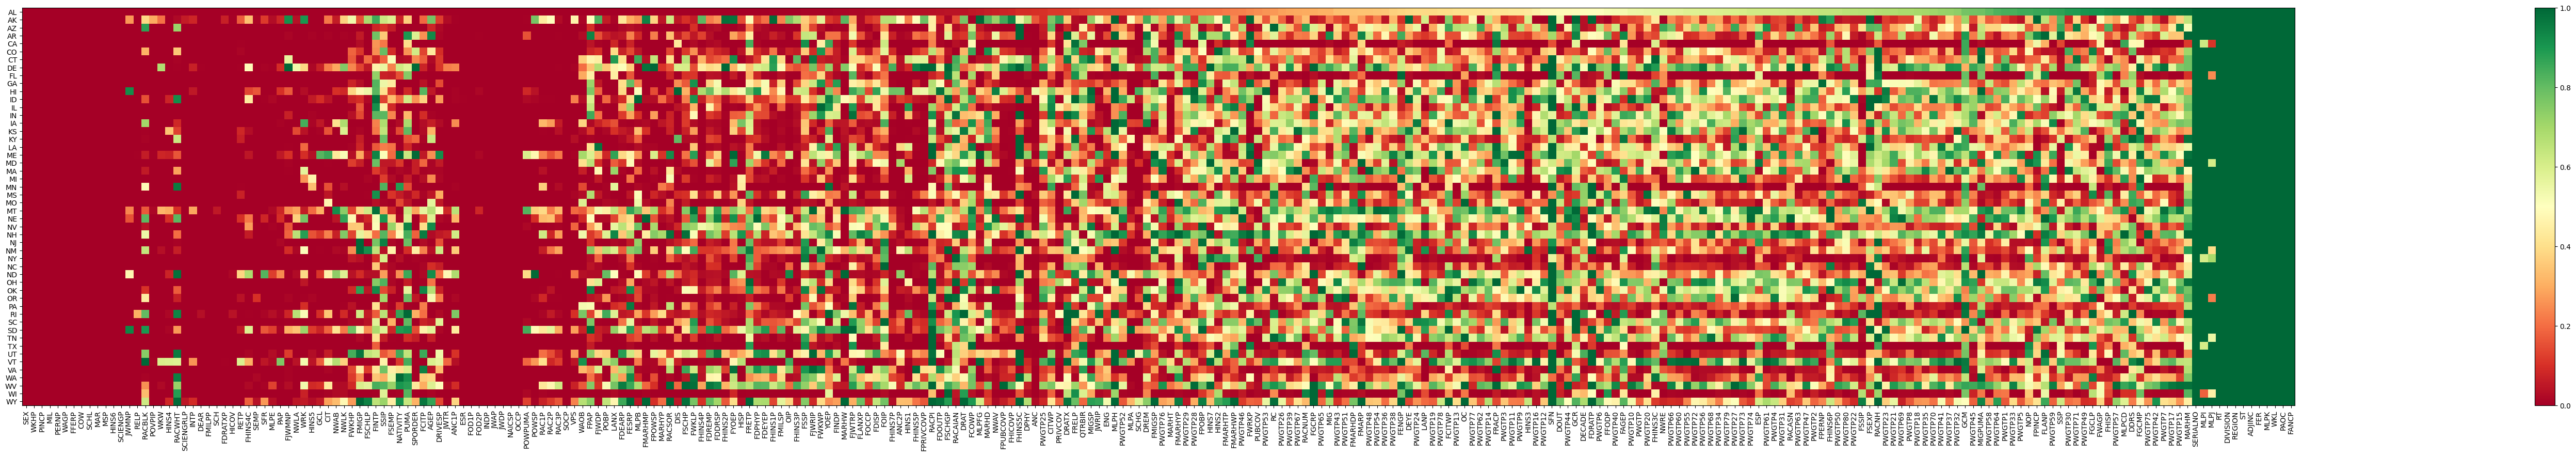

In [7]:
create_heatmap()

## States results

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from distinctipy import distinctipy

data = get_states_baseline(performance_metric = 'F1 Weighted', bias_metric = 'statistical_parity_difference')

# Find the maximum and minimum values for setting axis limits
max_accuracy = 1.0
min_accuracy = 0.0
max_bias = 0.25
min_bias = -0.25

# Create a figure and three subplots for each tuple
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Get a qualitative colormap with enough distinct colors for each state
num_states = len(data)
# colors = cm.tab20.colors + cm.tab20.colors * (num_states // 20 + 1)
colors = distinctipy.get_colors(num_states, pastel_factor=0.9, colorblind_type = "Tritanopia")

# Plot each tuple as a scatter plot in the corresponding subplot
for i, label in enumerate(['With gender', 'Without gender', 'Without gender proxies (baseline)']):
    for j, (state, l) in enumerate(data.items()):
        x_val, y_val = l[i][0], l[i][1]
        axs[i].scatter(x_val, y_val, label=state,  color=colors[j])

    axs[i].set_xlabel('F1')
    axs[i].set_ylabel('Bias')
    axs[i].set_title(f'{label}')
    axs[i].set_xlim(min_accuracy, max_accuracy)
    axs[i].set_ylim(min_bias, max_bias)

    # Add horizontal lines at y = -0.05 and y = 0.05
    axs[i].axhline(y=-0.05, color='red', linestyle='--')
    axs[i].axhline(y=0.05, color='red', linestyle='--')
 
# Create a single legend outside of the subplots and add it to the figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
plot_states_comparison(metric='Accuracy')

In [ ]:
plot_states_comparison(metric='statistical_parity_difference')

In [ ]:
plot_states_comparison(metric='F1 Weighted')

## Baseline difference

In [ ]:
plot_states_comparison(metric='Accuracy', metric_difference=False)

In [ ]:
plot_states_comparison(metric='statistical_parity_difference', metric_difference=True)

In [ ]:
def scatter_plot_comparision(colors = 'rows', labels = False):
    # Get matrices
    accuracy_matrix = get_metric_difference_matrix(round_n=-1)
    fairness_matrix = get_metric_difference_matrix(metric='statistical_parity_difference', round_n=-1)

    accuracy_matrix = np.array(list(accuracy_matrix.values()))
    fairness_matrix = np.array(list(fairness_matrix.values()))

    # Get states labels
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]

    concatenated_list = []

    for state in states:
        for other_state in states:
            concatenated_list.append(f"{state}-{other_state}")

    # Get the number of rows and columns in the matrices
    num_rows, num_cols = accuracy_matrix.shape

    # Create x and y coordinates for the scatter plot
    x_values = accuracy_matrix.flatten()  # Flatten the accuracy matrix into a 1D array
    y_values = fairness_matrix.flatten()  # Flatten the fairness matrix into a 1D array

    # Create an array of row and column indices corresponding to each point
    row_indices = np.repeat(np.arange(num_rows), num_cols)
    col_indices = np.tile(np.arange(num_cols), num_rows)

    if colors == 'rows':
        # Generate a color map based on the row number
        colors = plt.cm.tab20(row_indices / (num_rows - 1))
    elif colors == 'columns':
        # Generate a color map based on the column number
        colors = plt.cm.tab20(col_indices / (num_cols - 1))
    else:
        print('WARNING: colors not defined')

    # Increase the figure size
    plt.figure(figsize=(30, 15))  # Adjust the width and height as desired

    # Plot the scatter plot with colored points
    plt.scatter(x_values, y_values, c=colors)

    # Add labels to each point with reduced text size
    if labels == True:
        for i in range(len(x_values)):
            plt.text(x_values[i], y_values[i], f'{concatenated_list[i]}', ha='center', va='bottom', fontsize=5)

    # Set labels for the x and y axes
    plt.xlabel('Accuracy')
    plt.ylabel('Bias')

    # Set a title for the plot
    plt.title('Accuracy vs. Bias')

    # Show the plot
    plt.show()

scatter_plot_comparision(labels=True)


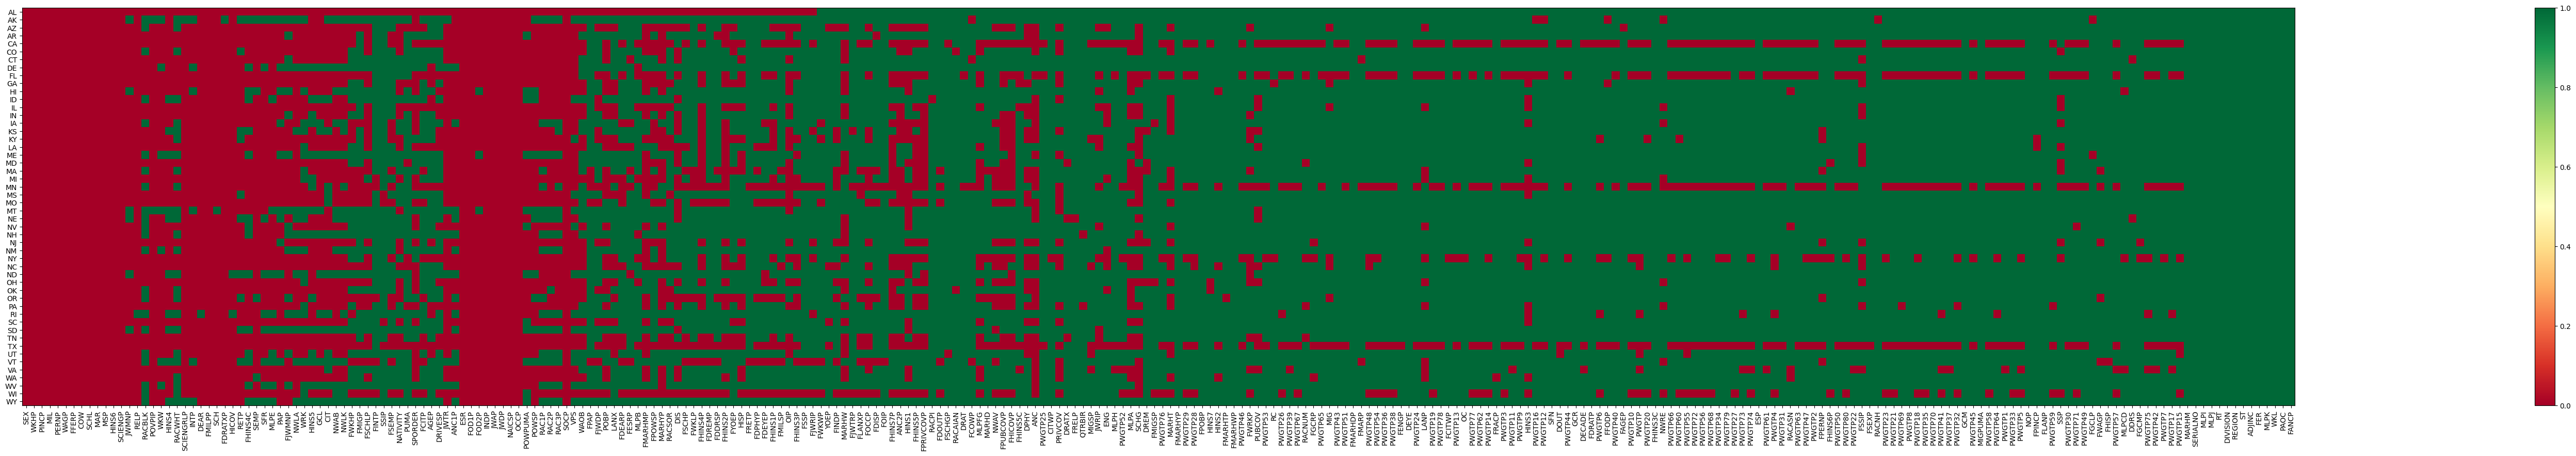

In [8]:
create_heatmap(threshold=0.01)

In [ ]:
def count_related_attributes(threshold = 0.01):
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]#, "PR"] # Removed: DC (district capital)

    # Define the list of attributes
    with open(f'./results/stats/{states[0]}_attributes_stats.json') as file:
        data = json.load(file)
        attributes = list(data.keys())

    # Initialize an empty dictionary to store the values
    related_attributes_count = {}

    # Read and process each file
    for state in states:
        with open(f'./results/stats/{state}_attributes_stats.json') as file:
            data = json.load(file)
            values = [data[attr] for attr in attributes]
            related_attributes_count[state] = sum(1 for n in values if n <= threshold)

    return related_attributes_count

related_attributes_count = count_related_attributes(threshold = 0.01)
print(dict(sorted(related_attributes_count.items(), key=lambda x: x[1])))


Findings:


- When using MT and AK attributes high accuracy but high bias (specially MT)
- Hypothesis: They consider just a small set of attributes gender dependent
- Experiments show that there are other states (WY and SD) that consider a smaller amount of gender dependent attributes and do not have this bad results
- New questions: Why montana has this bad results and not the others? which particular features are or aren't gender related in montana but yes in the others?


In [ ]:
scatter_plot_comparision(colors='columns', labels=False)

## States similarity

In [ ]:
def get_similarity_df(file_name):

    df_similarity = pd.read_csv(file_name, index_col=0)
    us_states = {
        "Alabama": "AL",
        "Alaska": "AK",
        "Arizona": "AZ",
        "Arkansas": "AR",
        "California": "CA",
        "Colorado": "CO",
        "Connecticut": "CT",
        "Delaware": "DE",
        "Florida": "FL",
        "Georgia": "GA",
        "Hawaii": "HI",
        "Idaho": "ID",
        "Illinois": "IL",
        "Indiana": "IN",
        "Iowa": "IA",
        "Kansas": "KS",
        "Kentucky": "KY",
        "Louisiana": "LA",
        "Maine": "ME",
        "Maryland": "MD",
        "Massachusetts": "MA",
        "Michigan": "MI",
        "Minnesota": "MN",
        "Mississippi": "MS",
        "Missouri": "MO",
        "Montana": "MT",
        "Nebraska": "NE",
        "Nevada": "NV",
        "New Hampshire": "NH",
        "New Jersey": "NJ",
        "New Mexico": "NM",
        "New York": "NY",
        "North Carolina": "NC",
        "North Dakota": "ND",
        "Ohio": "OH",
        "Oklahoma": "OK",
        "Oregon": "OR",
        "Pennsylvania": "PA",
        "Rhode Island": "RI",
        "South Carolina": "SC",
        "South Dakota": "SD",
        "Tennessee": "TN",
        "Texas": "TX",
        "Utah": "UT",
        "Vermont": "VT",
        "Virginia": "VA",
        "Washington": "WA",
        "West Virginia": "WV",
        "Wisconsin": "WI",
        "Wyoming": "WY"
    }

    df_similarity = df_similarity.rename(index=us_states, columns=us_states)

    return df_similarity

df_similarity = get_similarity_df(file_name='./data/similarity/state-similarity-distance-matrix.csv')

In [ ]:
df_similarity.columns

In [ ]:
def plot_states_similarity(df_similarity):

    # Get the unique states
    states = list(df_similarity.columns)

    # Create a matrix from the dictionary values
    matrix = np.array(df_similarity)

    # Create a figure and subplot with adjusted figure size
    fig, ax = plt.subplots(figsize=(24, 20))

    # Create the matrix plot
    im = ax.imshow(matrix, cmap='viridis', aspect='auto')  # set aspect='auto' for automatic aspect ratio

    # Set the tick labels and positions
    ax.set_xticks(np.arange(len(states)))
    ax.set_yticks(np.arange(len(states)))
    ax.set_xticklabels(states, rotation=45, ha='right')
    ax.set_yticklabels(states)

    # Loop over data dimensions and create text annotations
    for i in range(len(states)):
        for j in range(len(states)):
            text = ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')

    # Add a colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set the axis titles
    ax.set_ylabel('State dataset')
    ax.set_xlabel('State attributes')

    # Set the title and show the plot
    ax.set_title(f'States Similarity')
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

plot_states_similarity(df_similarity)

In [ ]:
def scatter_plot_similarity(metric = 'Accuracy', colors = 'rows', labels = False):
    # Get matrices
    df_similarity = get_similarity_df(file_name='./data/similarity/state-similarity-distance-matrix.csv')
    metric_matrix = get_metric_difference_matrix(metric=metric, round_n=-1)

    similarity_matrix = np.array(df_similarity)
    metric_matrix = np.array(list(metric_matrix.values()))
    # metric_matrix = abs(metric_matrix)

    # Get states labels
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]

    concatenated_list = []

    for state in states:
        for other_state in states:
            concatenated_list.append(f"{state}-{other_state}")

    # Get the number of rows and columns in the matrices
    num_rows, num_cols = similarity_matrix.shape

    # Create x and y coordinates for the scatter plot
    x_values = similarity_matrix.flatten()  # Flatten the accuracy matrix into a 1D array
    y_values = metric_matrix.flatten()  # Flatten the fairness matrix into a 1D array

    # Create an array of row and column indices corresponding to each point
    row_indices = np.repeat(np.arange(num_rows), num_cols)
    col_indices = np.tile(np.arange(num_cols), num_rows)

    if colors == 'rows':
        # Generate a color map based on the row number
        colors = plt.cm.tab20(row_indices / (num_rows - 1))
    elif colors == 'columns':
        # Generate a color map based on the column number
        colors = plt.cm.tab20(col_indices / (num_cols - 1))
    else:
        print('WARNING: colors not defined')

    # Increase the figure size
    plt.figure(figsize=(30, 15))  # Adjust the width and height as desired

    # Plot the scatter plot with colored points
    plt.scatter(x_values, y_values, c=colors)

    # Add labels to each point with reduced text size
    if labels == True:
        for i in range(len(x_values)):
            plt.text(x_values[i], y_values[i], f'{concatenated_list[i]}', ha='center', va='bottom', fontsize=5)

    # Set labels for the x and y axes
    plt.xlabel('Similarity')
    plt.ylabel(f'{metric}')

    # Set a title for the plot
    plt.title(f'Similarity vs. {metric}')

    # Show the plot
    plt.show()

In [ ]:
scatter_plot_similarity(metric='Accuracy', labels=True)

In [ ]:
scatter_plot_similarity(metric='statistical_parity_difference', labels=True)

## States indirect gender indicators

In [9]:
def get_most_common_attributes(threshold = 0.01):
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]#, "PR"] # Removed: DC (district capital)

    # Define the list of attributes
    with open(f'./results/stats/{states[0]}_attributes_stats.json') as file:
        data = json.load(file)
        attributes = list(data.keys())

    # Initialize an empty dictionary to store the values
    most_common_attributes = {}

    # Read and process each file
    for state in states:
        with open(f'./results/stats/{state}_attributes_stats.json') as file:
            data = json.load(file)

            for k,v in data.items():
                if v < threshold:
                    if k in most_common_attributes.keys():
                        most_common_attributes[k] += 1
                    else:
                        most_common_attributes[k] = 1

    return dict(sorted(most_common_attributes.items(), key=lambda x: x[1], reverse=True))
            

get_most_common_attributes()

{'SEX': 50,
 'WKHP': 50,
 'PINCP': 50,
 'MIL': 50,
 'PERNP': 50,
 'WAGP': 50,
 'FFERP': 50,
 'COW': 50,
 'SCHL': 50,
 'MAR': 50,
 'MSP': 50,
 'HINS6': 50,
 'SCIENGP': 50,
 'FMILPP': 50,
 'ESR': 50,
 'FOD1P': 50,
 'INDP': 50,
 'JWAP': 50,
 'JWDP': 50,
 'NAICSP': 50,
 'OCCP': 50,
 'SOCP': 50,
 'RELP': 49,
 'DEAR': 49,
 'SCH': 49,
 'FDRATXP': 49,
 'POVPIP': 48,
 'SCIENGRLP': 48,
 'HICOV': 48,
 'FOD2P': 47,
 'SEMP': 45,
 'JWMNP': 44,
 'INTP': 44,
 'WKW': 43,
 'JWTR': 43,
 'SFR': 41,
 'HINS4': 40,
 'RETP': 40,
 'MLPE': 40,
 'POWSP': 40,
 'PAP': 39,
 'NWLA': 38,
 'POWPUMA': 38,
 'GCL': 37,
 'VPS': 37,
 'ANC1P': 36,
 'RAC2P': 36,
 'FHINS4C': 35,
 'HINS5': 35,
 'NWAB': 35,
 'RAC3P': 35,
 'FJWMNP': 34,
 'RAC1P': 34,
 'MARHYP': 34,
 'ANC': 34,
 'CIT': 33,
 'NWLK': 32,
 'SCHG': 32,
 'FMARHMP': 31,
 'SPORDER': 30,
 'FSCHLP': 29,
 'POBP': 29,
 'RACBLK': 28,
 'WRK': 28,
 'OIP': 28,
 'FHINS4P': 27,
 'FHINS2P': 27,
 'MARHW': 27,
 'DIS': 26,
 'HINS1': 26,
 'MLPA': 26,
 'RACWHT': 25,
 'WAOB': 24,
 'MARH

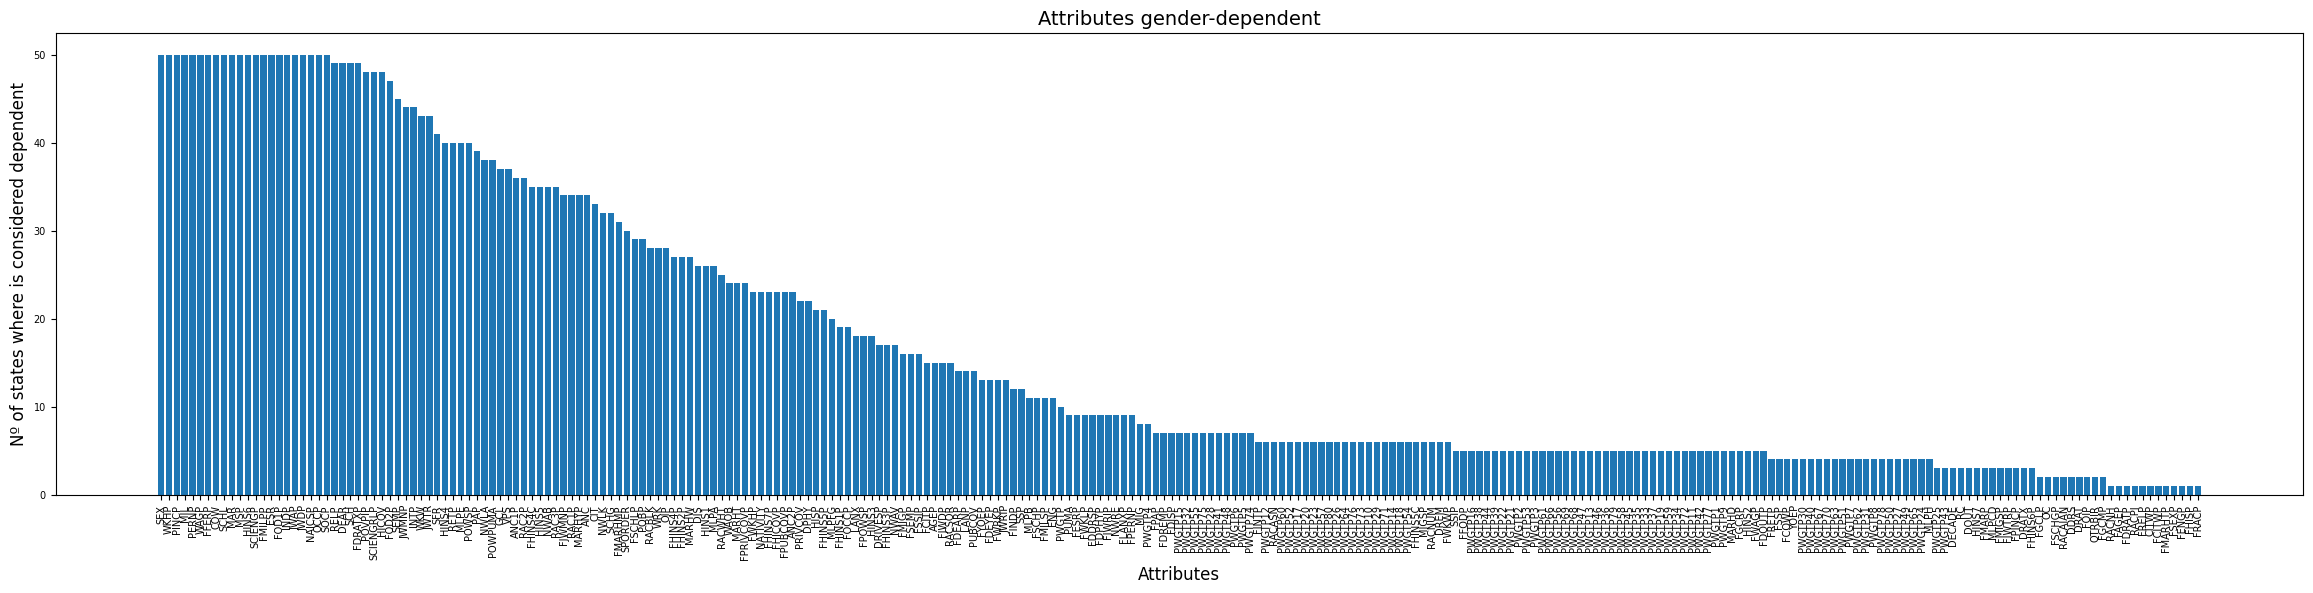

In [10]:
def bar_plot(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    # Increase figure size
    plt.figure(figsize=(29, 6))  # Adjust the width and height as desired
    
    # Create the bar plot
    plt.bar(keys, values)
    
    # Set axis labels and title
    plt.xlabel('Attributes', fontsize=12)  # Adjust the font size as desired
    plt.ylabel('Nº of states where is considered dependent', fontsize=12)  # Adjust the font size as desired
    plt.title('Attributes gender-dependent', fontsize=14)  # Adjust the font size as desired
    
    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90)
    
    # Adjust tick label font size
    plt.tick_params(axis='both', labelsize=7)  # Adjust the font size as desired
    
    plt.show()

bar_plot(get_most_common_attributes())

In [13]:
def get_uniqueness_df(threshold = 0.01, remove_attributes_not_used_in_training = False):
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]#, "PR"] # Removed: DC (district capital)

    most_common_attributes = get_most_common_attributes(threshold = threshold)

    uniqueness_df = pd.DataFrame(0, index=states, columns=most_common_attributes.keys())

    # Read and process each file
    for state in states:
        with open(f'./results/stats/{state}_attributes_stats.json') as file:
            data = json.load(file)

            for k,v in data.items():
                if v < threshold:
                    uniqueness_df.loc[state,k] = most_common_attributes[k]
                else:
                    uniqueness_df.loc[state,k] = 50

    if remove_attributes_not_used_in_training == True:
        # Remove attributes related with income 
        attributes_to_remove = ['PINCP', 'PERNP', 'WAGP', 'SEMP', 'RETP', 'INTP',
                                'SSP', 'SSIP', 'OIP', 'SERIALNO']
        uniqueness_df = uniqueness_df.drop(attributes_to_remove,axis=1, errors='ignore')
        
        # Remove Person Weight columns (columns that start with "PWGTP")
        uniqueness_df = uniqueness_df.filter(regex='^(?!PWGTP)')

    return uniqueness_df

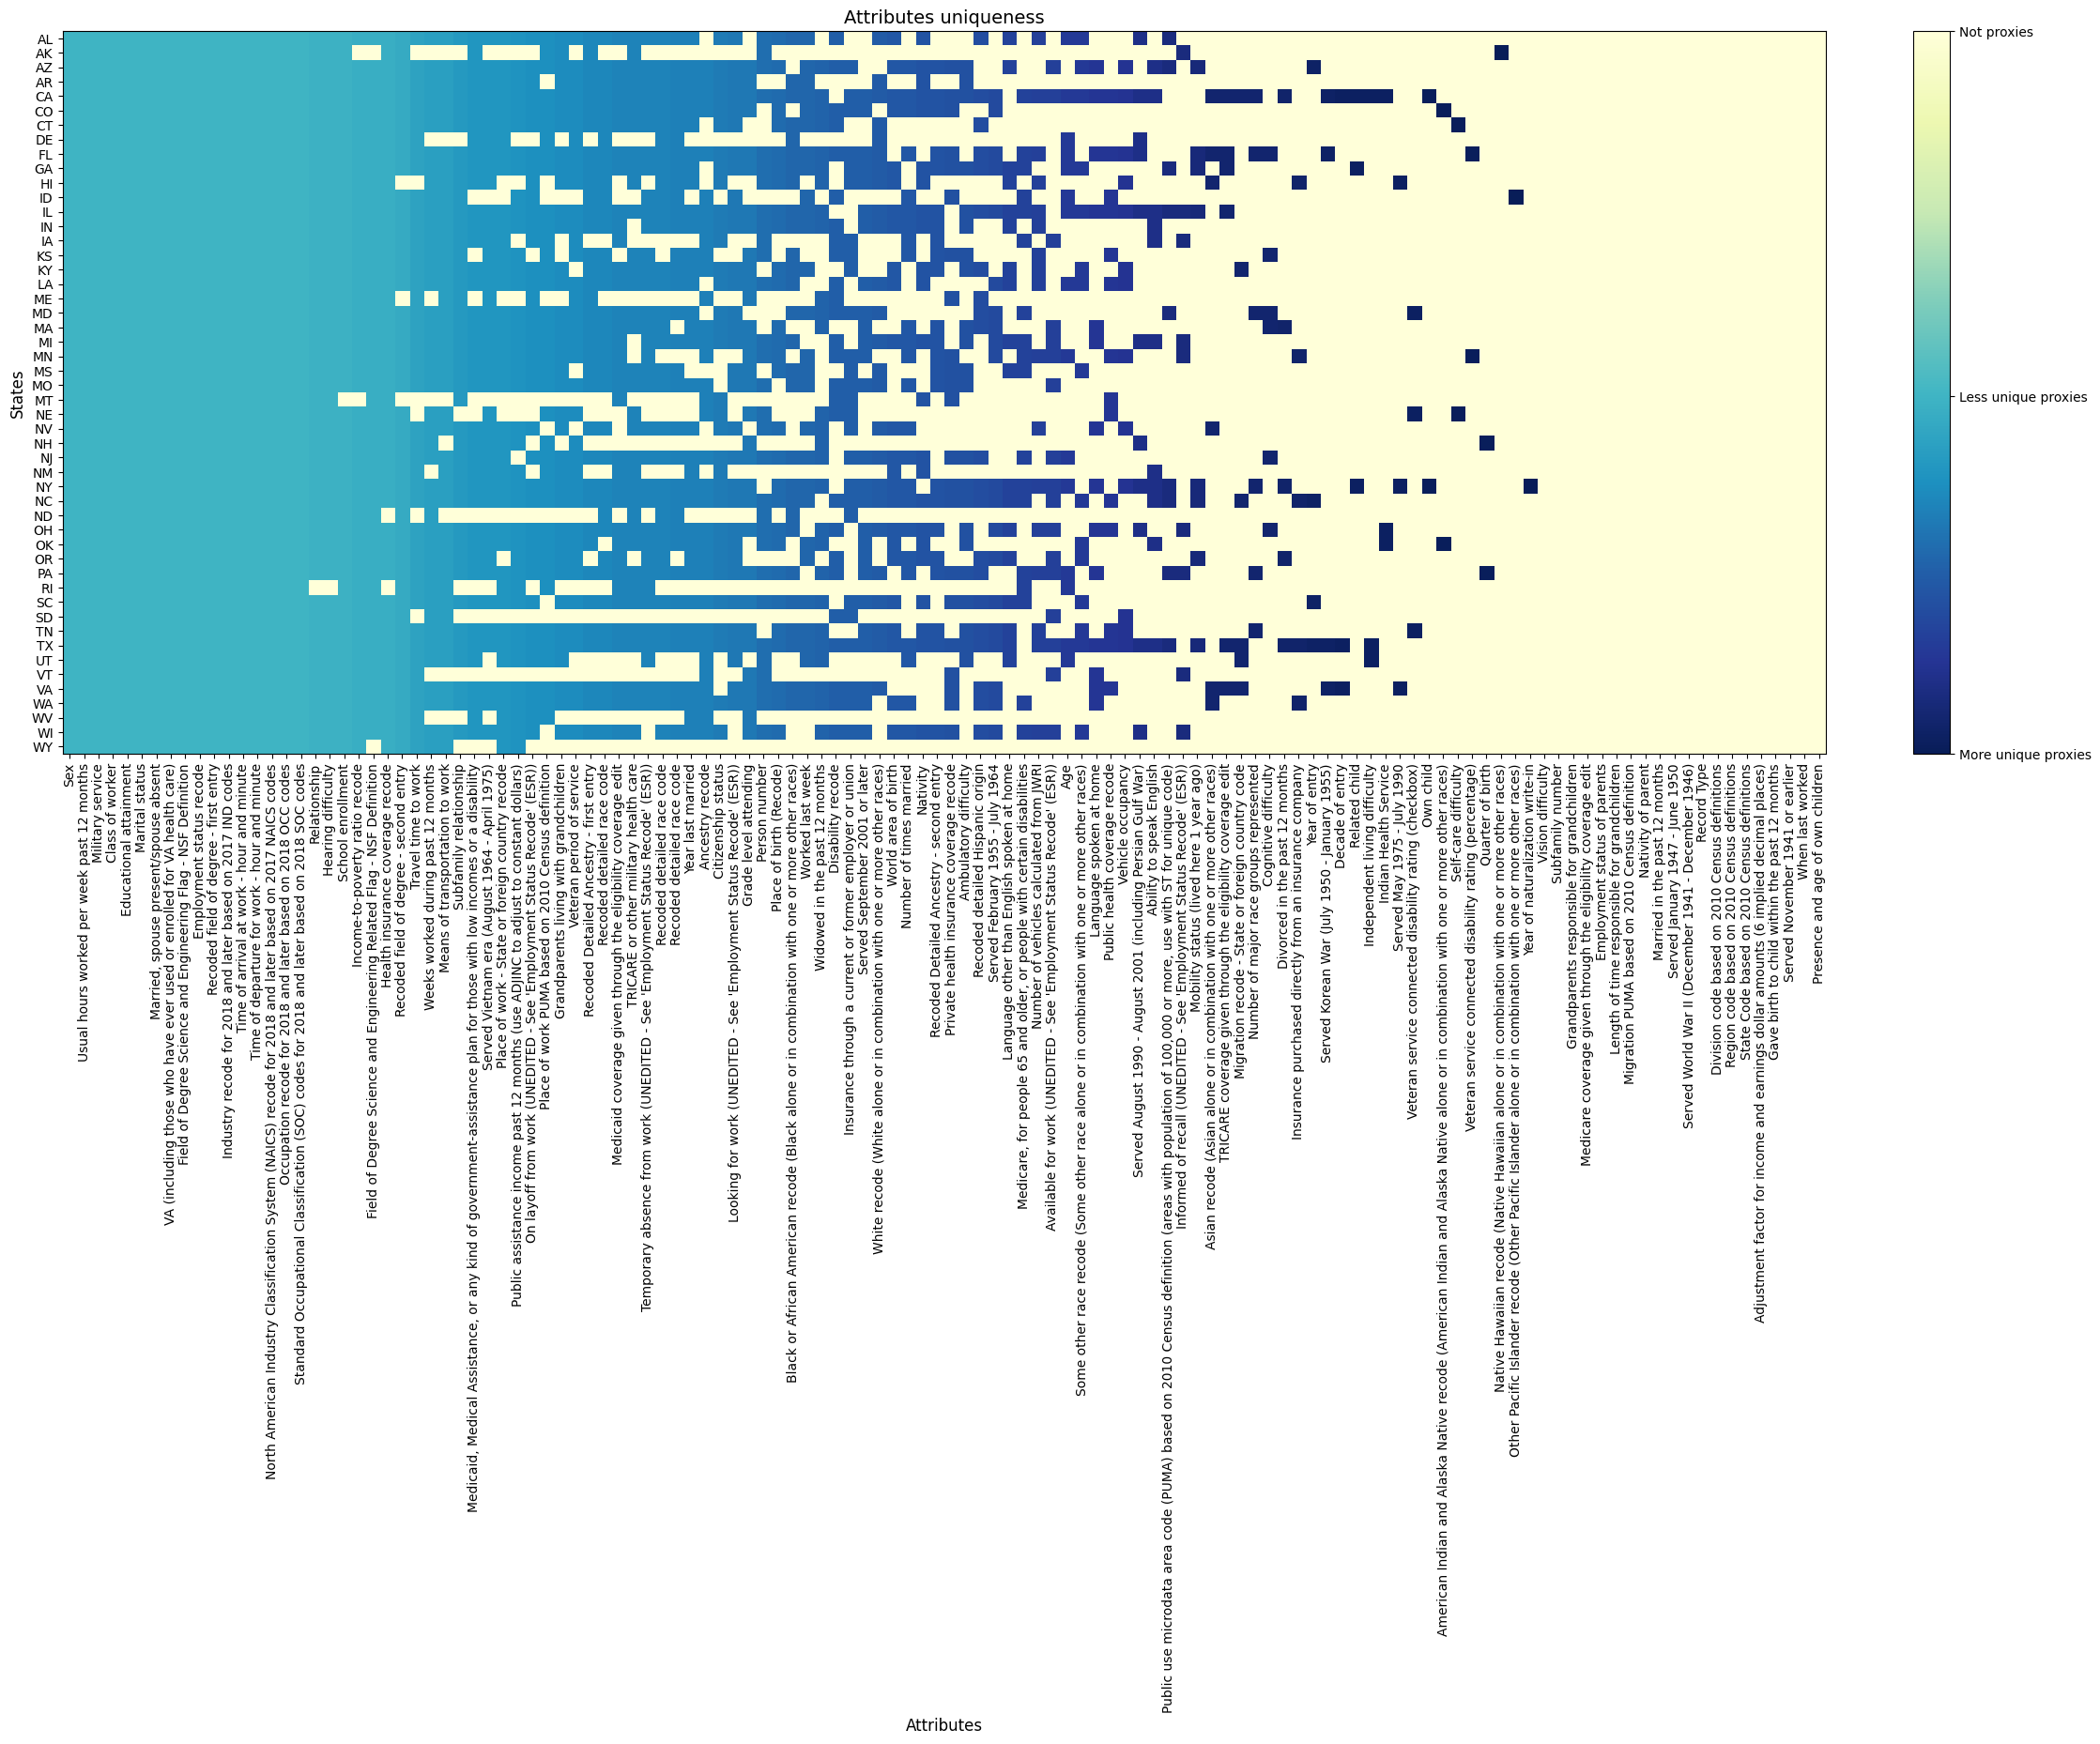

In [18]:
from folktables import ACSDataSource

def get_definition(definition_df, col_name):
    return definition_df[definition_df[0] == 'NAME'][definition_df[1] == col_name].iloc[0][4]

def get_attr_definition_list(attr_list):
    data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
    definition_df = data_source.get_definitions(download=False)

    definition_list = []

    for x in attr_list:
        definition_list.append(get_definition(definition_df, x))

    return definition_list

def uniqueness_heatmap(threshold = 0.01, remove_attributes_not_used_in_training = False, attr_definition = False, ignore_allocation = False, states = [], attributes = []):

    uniqueness_df = get_uniqueness_df(threshold, remove_attributes_not_used_in_training)

    if states != []:
        uniqueness_df.loc[states,:]
    if attributes != []:
        uniqueness_df.loc[:,attributes]

    if attr_definition == True:
        attr_definition_list = get_attr_definition_list(list(uniqueness_df.columns))
        uniqueness_df = uniqueness_df.rename(columns=dict(zip(uniqueness_df.columns, attr_definition_list)))

    if ignore_allocation == True:
        # Get a list of columns to drop using list comprehension
        columns_to_drop = [col for col in uniqueness_df.columns if 'allocation flag' in col]

        # Drop the columns from the dataframe
        uniqueness_df.drop(columns=columns_to_drop, inplace=True)

    # Convert the heatmap_values dictionary to a 2D numpy array
    heatmap_array = np.array(uniqueness_df)

    # Set the figure size based on the number of attributes and states
    fig, ax = plt.subplots(figsize=(120, 10))

    # Create the heatmap plot
    heatmap = ax.imshow(heatmap_array, cmap='YlGnBu_r', interpolation='nearest')
    cbar = plt.colorbar(heatmap, pad=0.01)

    # Set the x-axis and y-axis labels
    plt.xticks(np.arange(len(uniqueness_df.columns)), list(uniqueness_df.columns))

    plt.yticks(np.arange(len(uniqueness_df.index)), list(uniqueness_df.index))

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

    # Set axis labels and title
    plt.xlabel('Attributes', fontsize=12)  # Adjust the font size as desired
    plt.ylabel('States', fontsize=12)  # Adjust the font size as desired
    plt.title('Attributes uniqueness', fontsize=14)  # Adjust the font size as desired

    # Add custom labels at the top and bottom of the color bar values
    cbar.set_ticks([heatmap_array.min(), 50, heatmap_array.max()])
    cbar.set_ticklabels(['More unique proxies', 'Less unique proxies', 'Not proxies'])
    cbar.ax.tick_params(labelsize=10)  # Adjust the font size of the color bar labels as desired

    return uniqueness_df


uniqueness_df = uniqueness_heatmap(remove_attributes_not_used_in_training = True, attr_definition = True, ignore_allocation = True)

In [ ]:
uniqueness_df_sample = uniqueness_df.loc[['UT', 'TX', "CA", 'CT', 'NE', 'NY'],['Military service', 'Number of times married', 'Independent living difficulty', 'Self-care difficulty', 'Public health coverage recode']]
uniqueness_df_sample

In [ ]:
 # Convert the heatmap_values dictionary to a 2D numpy array
heatmap_array = np.array(uniqueness_df_sample)

# Set the figure size based on the number of attributes and states
fig, ax = plt.subplots(figsize=(5, 3))

# Create the heatmap plot
heatmap = ax.imshow(heatmap_array, cmap='YlGnBu_r', interpolation='nearest')
cbar = plt.colorbar(heatmap, pad=0.05)

# Display actual values in the heatmap cells
for i in range(len(uniqueness_df_sample.index)):
    for j in range(len(uniqueness_df_sample.columns)):
        text = ax.text(j, i, f'{heatmap_array[i, j]}', ha='center', va='center', color='black')

# Set the x-axis and y-axis labels
plt.xticks(np.arange(len(uniqueness_df_sample.columns)), list(uniqueness_df_sample.columns))

plt.yticks(np.arange(len(uniqueness_df_sample.index)), list(uniqueness_df_sample.index))

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set axis labels and title
plt.xlabel('Attributes', fontsize=10)  # Adjust the font size as desired
plt.ylabel('States', fontsize=10)  # Adjust the font size as desired
plt.title('Attributes uniqueness', fontsize=12)  # Adjust the font size as desired

# Add custom labels at the top and bottom of the color bar values
cbar.set_ticks([heatmap_array.min(), heatmap_array.max()])
cbar.set_ticklabels(['More unique', 'Less unique'])
cbar.ax.tick_params(labelsize=8)  # Adjust the font size of the color bar labels as desired

In [ ]:
def get_n_dependent_attributes(threshold = 0.01):
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]#, "PR"] # Removed: DC (district capital)

    # Initialize an empty dictionary to store the values
    n_dependent_attributes = {}

    # Read and process each file
    for state in states:
        with open(f'./results/stats/{state}_attributes_stats.json') as file:
            data = json.load(file)

            for k,v in data.items():
                if v < threshold:
                    if state in n_dependent_attributes.keys():
                        n_dependent_attributes[state] += 1
                    else:
                        n_dependent_attributes[state] = 1

    return dict(sorted(n_dependent_attributes.items(), key=lambda x: x[1], reverse=False))
            

get_n_dependent_attributes()

In [ ]:
n_dependent_attributes = get_n_dependent_attributes()
df = pd.DataFrame(list(n_dependent_attributes.items()), columns=['State', 'Number of gender proxies'])
df

In [ ]:
def scatter_plot_comparision(colors = 'rows', labels = False):
    # Get matrices
    accuracy_matrix = get_metric_difference_matrix(round_n=-1)
    fairness_matrix = get_metric_matrix(metric='statistical_parity_difference', round_n=-1)

    accuracy_matrix = np.array(list(accuracy_matrix.values()))
    fairness_matrix = np.array(list(fairness_matrix.values()))

    # Get states labels
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]

    concatenated_list = []

    for state in states:
        for other_state in states:
            concatenated_list.append(f"{state}-{other_state}")

    # Get the number of rows and columns in the matrices
    num_rows, num_cols = accuracy_matrix.shape

    # Create x and y coordinates for the scatter plot
    x_values = accuracy_matrix.flatten()  # Flatten the accuracy matrix into a 1D array
    y_values = fairness_matrix.flatten()  # Flatten the fairness matrix into a 1D array

    # Create an array of row and column indices corresponding to each point
    row_indices = np.repeat(np.arange(num_rows), num_cols)
    col_indices = np.tile(np.arange(num_cols), num_rows)

    if colors == 'rows':
        # Generate a color map based on the row number
        colors = plt.cm.tab20(row_indices / (num_rows - 1))
    elif colors == 'columns':
        # Generate a color map based on the column number
        colors = plt.cm.tab20(col_indices / (num_cols - 1))
    else:
        print('WARNING: colors not defined')

    # Increase the figure size
    plt.figure(figsize=(30, 15))  # Adjust the width and height as desired

    # Plot the scatter plot with colored points
    plt.scatter(x_values, y_values, c=colors)

    # Add labels to each point with reduced text size
    if labels == True:
        for i in range(len(x_values)):
            plt.text(x_values[i], y_values[i], f'{concatenated_list[i]}', ha='center', va='bottom', fontsize=5)

    # Set labels for the x and y axes
    plt.xlabel('Accuracy')
    plt.ylabel('Bias')

    # Set a title for the plot
    plt.title('Accuracy vs. Bias')

    # Show the plot
    plt.show()

scatter_plot_comparision(labels=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import distinctipy
import matplotlib.gridspec as gridspec

def scatter_plot_comparision(accuracy_matrix1, fairness_matrix1, accuracy_matrix2, fairness_matrix2, labels=False):
    # Get states labels
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
              "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
              "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
              "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
              "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
              "WY"]

    colors = distinctipy.get_colors(len(states), colorblind_type = "Tritanopia", pastel_factor=0.7)

    # Increase the figure size to accommodate two square plots side by side
    fig = plt.figure(figsize=(20, 8))

    # Create a 1x2 grid layout for two subplots
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # First scatter plot
    ax1 = plt.subplot(gs[0], aspect='auto')  # Use the first cell of the grid layout

    # Add the horizontal lines at y=-0.05 and y=0.05
    ax1.axhline(y=-0.05, color='red', linestyle='--', linewidth=1)
    ax1.axhline(y=0.05, color='red', linestyle='--', linewidth=1)
    
    for i, s1 in enumerate(states):
        for j, s2 in enumerate(states):
            x_val, y_val = accuracy_matrix1[i][j], fairness_matrix1[i][j]
            ax1.scatter(x_val, y_val, label=s1, s=100, edgecolor=colors[j], facecolor=colors[i], linewidths=2)
            if labels:
                ax1.text(x_val, y_val, f'{s1}-{s2}', ha='center', va='bottom', fontsize=7)

    # Set labels for the x and y axes
    ax1.set_xlabel('Accuracy')
    ax1.set_ylabel('Bias')

    # Set a title for the plot
    ax1.set_title('Accuracy vs. Bias')

    # Second scatter plot
    ax2 = plt.subplot(gs[1], aspect='auto')  # Use the second cell of the grid layout

    # Add the horizontal lines at y=-0.05 and y=0.05
    # ax2.axhline(y=-0.05, color='red', linestyle='--', linewidth=1)
    # ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=1)

    for i, s1 in enumerate(states):
        for j, s2 in enumerate(states):
            x_val, y_val = accuracy_matrix2[i][j], fairness_matrix2[i][j]
            ax2.scatter(x_val, y_val, label=s1, s=100, edgecolor=colors[j], facecolor=colors[i], linewidths=2)
            if labels:
                ax2.text(x_val, y_val, f'{s1}-{s2}', ha='center', va='bottom', fontsize=7)

    # Set labels for the x and y axes
    ax2.set_xlabel('Accuracy difference')
    ax2.set_ylabel('Bias difference')

    # Set a title for the plot
    ax2.set_title('Accuracy difference from baseline and bias')

    # Adjust layout to prevent overlapping of subplots and legend
    plt.tight_layout()

    # Create the custom legend patches for both plots
    legend_patches = []
    for i, state in enumerate(states):
        legend_patches.append(plt.Line2D([], [], marker='o', markersize=10, markeredgecolor=colors[i], markerfacecolor=colors[i], label=state))

    # Add the custom legend in the center of the entire figure
    fig.legend(handles=legend_patches, loc='upper center', ncol=25, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, handlelength=0, borderpad=0.8)

    # Show both plots
    plt.show()

# Get matrices
accuracy_matrix = get_metric_matrix(metric='Accuracy', round_n=-1)
fairness_matrix = get_metric_matrix(metric='statistical_parity_difference', round_n=-1)
accuracy_difference_matrix = get_metric_difference_matrix(round_n=-1)
fairness_difference_matrix = get_metric_difference_matrix(metric='statistical_parity_difference', round_n=-1)

accuracy_matrix = np.array(list(accuracy_matrix.values()))
fairness_matrix = np.array(list(fairness_matrix.values()))
accuracy_difference_matrix = np.array(list(accuracy_difference_matrix.values()))
fairness_difference_matrix = np.array(list(fairness_difference_matrix.values()))

scatter_plot_comparision(accuracy_matrix, fairness_matrix, accuracy_difference_matrix, fairness_difference_matrix, labels=False)

Just highlight the most important ones:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import distinctipy
import matplotlib.gridspec as gridspec

def scatter_plot_comparision(accuracy_matrix1, fairness_matrix1, accuracy_matrix2, fairness_matrix2, labels=False):
    # Get states labels
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
              "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
              "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
              "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
              "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
              "WY"]
    
    highlight = ['MT', 'VT', 'UT', 'LA', 'NY', 'NE']
    
    colors = distinctipy.get_colors(len(highlight), colorblind_type = "Tritanopia", pastel_factor=0.7)
    gray_color = (0.97, 0.97, 0.97)
    
    # Increase the figure size to accommodate two square plots side by sideaz
    fig = plt.figure(figsize=(20, 8))

    # Create a 1x2 grid layout for two subplots
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # First scatter plot
    ax1 = plt.subplot(gs[0], aspect='auto')  # Use the first cell of the grid layout

    # Add the horizontal lines at y=-0.05 and y=0.05
    ax1.axhline(y=-0.05, color='red', linestyle='--', linewidth=1)
    ax1.axhline(y=0.05, color='red', linestyle='--', linewidth=1)
    
    for i, s1 in enumerate(states):
        for j, s2 in enumerate(states):
            x_val, y_val = accuracy_matrix1[i][j], fairness_matrix1[i][j]
            if s1 in highlight and s2 in highlight:
                c1 = colors[highlight.index(s1)]
                c2 = colors[highlight.index(s2)]
                ax1.scatter(x_val, y_val, label=s1, s=100, edgecolor=c2, facecolor=c1, linewidths=2, zorder = 10)
                if labels:
                    ax1.text(x_val, y_val, f'{s1}-{s2}', ha='center', va='bottom', fontsize=7)
            else:
                ax1.scatter(x_val, y_val, label=s1, s=100, edgecolor=gray_color, facecolor=gray_color, linewidths=2, zorder = 1)


    # Set labels for the x and y axes
    ax1.set_xlabel('Accuracy')
    ax1.set_ylabel('Bias')

    # Set a title for the plot
    ax1.set_title('Accuracy vs. Bias')

    # Second scatter plot
    ax2 = plt.subplot(gs[1], aspect='auto')  # Use the second cell of the grid layout

    # Add the horizontal lines at y=-0.05 and y=0.05
    # ax2.axhline(y=-0.05, color='red', linestyle='--', linewidth=1)
    # ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=1)

    for i, s1 in enumerate(states):
        for j, s2 in enumerate(states):
            x_val, y_val = accuracy_matrix2[i][j], fairness_matrix2[i][j]
            if s1 in highlight and s2 in highlight:
                c1 = colors[highlight.index(s1)]
                c2 = colors[highlight.index(s2)]
                ax2.scatter(x_val, y_val, label=s1, s=100, edgecolor=c2, facecolor=c1, linewidths=2, zorder = 10)
                if labels:
                    ax2.text(x_val, y_val, f'{s1}-{s2}', ha='center', va='bottom', fontsize=7)
            else:
                ax2.scatter(x_val, y_val, label=s1, s=100, edgecolor=gray_color, facecolor=gray_color, linewidths=2, zorder = 1)

    # Set labels for the x and y axes
    ax2.set_xlabel('Accuracy difference')
    ax2.set_ylabel('Bias difference')

    # Set a title for the plot
    ax2.set_title('Accuracy and bias difference from baseline')

    # Adjust layout to prevent overlapping of subplots and legend
    plt.tight_layout()

    # Create the custom legend patches for both plots
    legend_patches = []
    for i, state in enumerate(highlight):
        legend_patches.append(plt.Line2D([], [], marker='o', markersize=10, markeredgecolor=colors[i], markerfacecolor=colors[i], label=state))

    # Add the custom legend in the center of the entire figure
    fig.legend(handles=legend_patches, loc='upper center', ncol=len(highlight), bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, handlelength=0, borderpad=0.8)

    # Show both plots
    plt.show()

# Get matrices
accuracy_matrix = get_metric_matrix(metric='Accuracy', round_n=-1)
fairness_matrix = get_metric_matrix(metric='statistical_parity_difference', round_n=-1)
accuracy_difference_matrix = get_metric_difference_matrix(round_n=-1)
fairness_difference_matrix = get_metric_difference_matrix(metric='statistical_parity_difference', round_n=-1)

accuracy_matrix = np.array(list(accuracy_matrix.values()))
fairness_matrix = np.array(list(fairness_matrix.values()))
accuracy_difference_matrix = np.array(list(accuracy_difference_matrix.values()))
fairness_difference_matrix = np.array(list(fairness_difference_matrix.values()))

scatter_plot_comparision(accuracy_matrix, fairness_matrix, accuracy_difference_matrix, fairness_difference_matrix, labels=False)

## Stats

In [ ]:
def get_transfer_knowledge_stats(metric = 'statistical_parity_difference'):

    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
            "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
            "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
            "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
            "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
            "WY"]

    stats = {'bias towards males':0, 'bias towards females':0, 'fair':0}

    for state_dataset in states:

        for s in states:

            if s != state_dataset:
                file_name = f'./results/transfer_results/{state_dataset}/{s}_attributes_in_{state_dataset}_data.json'

                with open(file_name) as file:
                    data = json.load(file)
                    spd = data[metric][0]

                    if spd < -0.05:
                        stats['bias towards females'] += 1
                    elif spd > 0.05:
                        stats["bias towards males"] += 1
                    else:
                        stats["fair"] += 1
                
                
    return stats

get_transfer_knowledge_stats()

## Create Github images

In [ ]:
def get_proxies_json(threshold = 0.01):
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]

    # Initialize an empty dictionary to store the values
    proxies_json = {}

    data_source = ACSDataSource(survey_year=2018, horizon='1-Year', survey='person')
    definition_df = data_source.get_definitions(download=True)
    
    # Read and process each file
    for state in states:
        proxies_json[state] = {'gender proxies': [], 'not gender proxies': []}
        with open(f'./results/stats/{state}_attributes_stats.json') as file:
            data = json.load(file)

            proxies_json[state]['gender proxies'] = [{k:get_definition(definition_df, k)} for k,v in data.items() if v < threshold]
            proxies_json[state]['not gender proxies'] = [{k:get_definition(definition_df, k)} for k,v in data.items() if v >= threshold]

    return proxies_json

proxies_json = get_proxies_json()
with open('./results/proxies/gender_proxies.json', 'w') as f:
    json.dump(proxies_json, f)

In [ ]:
def get_set_proxies():
    # Define the list of states
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]

    # Initialize an empty dictionary to store the values
    proxies_json = get_proxies_json()

    df_set_proxies = pd.DataFrame(0, index=states, columns=states)
    
    # Read and process each file
    for s1 in states:
        s1_proxies = [proxy for d in proxies_json[s1]['gender proxies'] for proxy in d.keys()]
        for s2 in states:
            s2_proxies = [proxy for d in proxies_json[s2]['gender proxies'] for proxy in d.keys()]
            df_set_proxies.loc[s1, s2] = len(set(s1_proxies) & set(s2_proxies))

    return df_set_proxies

df_set_proxies = get_set_proxies()
df_set_proxies
    

In [ ]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]

# Plotting the heatmap using matplotlib
plt.figure(figsize=(20, 20))  # Adjust the figure size if needed
plt.imshow(df_set_proxies, cmap='YlGnBu', aspect='auto', interpolation='nearest')

# Adding values to each cell
for i in range(len(states)):
    for j in range(len(states)):
        plt.text(j, i, df_set_proxies.iloc[i, j], ha='center', va='center', color='black', fontsize=8)


# Adding labels and ticks
plt.title("Heatmap of shared proxies")
plt.colorbar()
plt.xticks(range(len(states)), states)
plt.yticks(range(len(states)), states)
plt.show()

In [ ]:
def save_scatter_plot_comparision(states, accuracy_matrix1, fairness_matrix1, accuracy_matrix2, fairness_matrix2, labels=False, highlight = [], colors = None):
    
    if colors == None:
        colors = distinctipy.get_colors(len(states), colorblind_type = "Tritanopia", pastel_factor=0.7)
        
    gray_color = (0.97, 0.97, 0.97)
    
    # Increase the figure size to accommodate two square plots side by sideaz
    fig = plt.figure(figsize=(20, 8))

    # Create a 1x2 grid layout for two subplots
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # First scatter plot
    ax1 = plt.subplot(gs[0], aspect='auto')  # Use the first cell of the grid layout

    # Add the horizontal lines at y=-0.05 and y=0.05
    ax1.axhline(y=-0.05, color='red', linestyle='--', linewidth=1)
    ax1.axhline(y=0.05, color='red', linestyle='--', linewidth=1)
    
    for i, s1 in enumerate(states):
        for j, s2 in enumerate(states):
            x_val, y_val = accuracy_matrix1[i][j], fairness_matrix1[i][j]
            #if s1 in highlight:
            if s2 in highlight:
                c1 = colors[i]
                c2 = colors[j]
                ax1.scatter(x_val, y_val, label=s1, s=100, edgecolor=c2, facecolor=c1, linewidths=2, zorder = 10)
                if labels:
                    ax1.text(x_val, y_val, f'{s1}-{s2}', ha='center', va='bottom', fontsize=7)
            else:
                ax1.scatter(x_val, y_val, label=s1, s=100, edgecolor=gray_color, facecolor=gray_color, linewidths=2, zorder = 1)


    # Set labels for the x and y axes
    ax1.set_xlabel('Accuracy')
    ax1.set_ylabel('Bias')

    # Set a title for the plot
    ax1.set_title('Accuracy vs. Bias')

    # Second scatter plot
    ax2 = plt.subplot(gs[1], aspect='auto')  # Use the second cell of the grid layout

    # Add the horizontal lines at y=-0.05 and y=0.05
    # ax2.axhline(y=-0.05, color='red', linestyle='--', linewidth=1)
    # ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=1)

    for i, s1 in enumerate(states):
        for j, s2 in enumerate(states):
            x_val, y_val = accuracy_matrix2[i][j], fairness_matrix2[i][j]
            #if s1 in highlight:
            if s2 in highlight:
                c1 = colors[i]
                c2 = colors[j]
                ax2.scatter(x_val, y_val, label=s1, s=100, edgecolor=c2, facecolor=c1, linewidths=2, zorder = 10)
                if labels:
                    ax2.text(x_val, y_val, f'{s1}-{s2}', ha='center', va='bottom', fontsize=7)
            else:
                ax2.scatter(x_val, y_val, label=s1, s=100, edgecolor=gray_color, facecolor=gray_color, linewidths=2, zorder = 1)

    # Set labels for the x and y axes
    ax2.set_xlabel('Accuracy difference')
    ax2.set_ylabel('Bias difference')

    # Set a title for the plot
    ax2.set_title('Accuracy and bias difference from baseline')

    # Adjust layout to prevent overlapping of subplots and legend
    plt.tight_layout()

    # Create the custom legend patches for both plots
    legend_patches = []
    for i, state in enumerate(states):
        legend_patches.append(plt.Line2D([], [], marker='o', markersize=10, markeredgecolor=colors[i], markerfacecolor=colors[i], label=state))

    # Add the custom legend in the center of the entire figure
    legend = fig.legend(handles=legend_patches, loc='upper center', ncol=25, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, handlelength=0, borderpad=0.8)

    # Adjust layout to prevent overlapping of subplots and legend
    plt.tight_layout()

    # Show both plots
    plt.savefig(f'./results/transfer_images/{highlight[0]}_proxies_in_states.png', bbox_extra_artists=(legend,), bbox_inches='tight')

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
              "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
              "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
              "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
              "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
              "WY"]

# Get matrices
accuracy_matrix = get_metric_matrix(metric='Accuracy', round_n=-1)
fairness_matrix = get_metric_matrix(metric='statistical_parity_difference', round_n=-1)
accuracy_difference_matrix = get_metric_difference_matrix(round_n=-1)
fairness_difference_matrix = get_metric_difference_matrix(metric='statistical_parity_difference', round_n=-1)

accuracy_matrix = np.array(list(accuracy_matrix.values()))
fairness_matrix = np.array(list(fairness_matrix.values()))
accuracy_difference_matrix = np.array(list(accuracy_difference_matrix.values()))
fairness_difference_matrix = np.array(list(fairness_difference_matrix.values()))

colors = distinctipy.get_colors(len(states), colorblind_type = "Tritanopia", pastel_factor=0.7)

for s in states:
    save_scatter_plot_comparision(states, accuracy_matrix, fairness_matrix, accuracy_difference_matrix, 
                             fairness_difference_matrix, labels=False, colors = colors, highlight=[s])

# Other

In [53]:
# Libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import numpy as np
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from xgboost import XGBClassifier, plot_tree, plot_importance
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from folktables import ACSDataSource, ACSEmployment, BasicProblem, adult_filter, generate_categories
import math
import os.path
import json
from mpl_toolkits import mplot3d

# Own modules
import apply_metrics
from preprocessing import get_data, clean_data, process_data, split_data, get_res_df, decoding, get_df4chi
from statistical_measures import get_entropy, get_mi, get_gr, get_suc, get_chi2, get_mannwhitneyu, get_fisher_exact, combine_dicts, apply_categorical_tests
from machine_learning import train_model, test_model, print_results, search_best_attributes, search_best_attributes_for_fairness, forward_regression, backward_regression
from visualization import show_histogram, compare_histogram, show_correlation_matrix, plot_dictionaries, plot_horizontal_dictionaries

pip install 'aif360[LawSchoolGPA]'
2024-02-05 11:36:42.905776: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Get data

In [56]:
def get_data(state, year = '2018'):

    STATES = [state]
    YEAR = year

    data_source = ACSDataSource(survey_year=YEAR, horizon='1-Year', survey='person')
    acs_data = data_source.get_data(states=STATES, download=False)

    feature_codes = list(acs_data.columns)

    ACSIncome = BasicProblem(
        features=[feature_codes],
        target='PINCP',
        target_transform=lambda x: x > 50000,    
        group='SEX',
        preprocess=adult_filter,
        postprocess=lambda x: x,
    )

    features, label, group = ACSIncome.df_to_numpy(acs_data)
    df = pd.concat([pd.DataFrame(features), pd.DataFrame(label)], axis=1)
    df.columns = feature_codes + ['TARGET']

    definition_df = data_source.get_definitions(download=True)

    return df, definition_df

### Data cleaning

In [ ]:
def get_definition(definition_df, col_name):
    return definition_df[definition_df[0] == 'NAME'][definition_df[1] == col_name].iloc[0][4]

def get_category_type(definition_df, col_name):
    return definition_df[definition_df[0] == 'NAME'][definition_df[1] == col_name].iloc[0][2]

def get_values_dict(definition_df, col_name):
    values_df = definition_df[definition_df[0] == 'VAL'][definition_df[1] == col_name]
    values_dict = {} 

    for i,r in values_df.iterrows():
        values_dict[r[4]] = r[6]
        
    return values_dict

def transform_columns_type(df):
    for c in df.columns:
        try:
            df[c] = pd.to_numeric(df[c])
        except:
            pass
    
    return df

def process_dictionary(d):
    processed_dict = {}
    
    for k,v in d.items():
        if isinstance(k, str) and k.isdigit():
            k = float(k)
        if isinstance(v, str) and v.isdigit():
            v = float(v)
        processed_dict[k] = v
        
    return processed_dict

def calculate_nan_percentage_gender(df, gender_column = 'gender'):
    nan_columns = df.columns[df.isna().any()].tolist() + [gender_column]
    
    # dataframe with only the columns that have NaN values
    df = df[nan_columns]

    # Group the dataframe by gender
    gender_groups = df.groupby(gender_column)
    
    # Calculate the percentage of NaN values per column for each gender group
    nan_percentages = gender_groups.apply(lambda x: x.isna().mean() * 100)
    
    # Add difference
    nan_percentages.loc['Difference'] = abs(nan_percentages.diff().iloc[-1])
    
    # Print the result
    return nan_percentages

def clean_nan(df, percentage = 5, verbose = False):
    # Calculate percentage of NaNs per column
    nan_percentages = df.isna().sum() / len(df) * 100
    
    # Print NaN percentages per column
    if verbose == True:
        print('NaN percentages per column:\n', nan_percentages[nan_percentages > 0])
    
    # Get column names where more than percentage% of values are NaN
    nan_columns = nan_percentages[nan_percentages > percentage].index
    if verbose == True:
        print('Removing:\n', nan_columns)
    
    # Remove columns with more than percentage% NaN values
    df = df.drop(nan_columns, axis=1)

    # Fill NaN values in numerical columns with median
    numerical_columns = df.select_dtypes(include=['number']).columns
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median()) 
    
    # Replace NaN values in categorical columns with 'nan_category'
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns   
    df[categorical_columns] = df[categorical_columns].fillna('nan_category')
    
    return df

def clean_df(df, definition_df):

    df_cleaned = transform_columns_type(df)

    for c in df_cleaned.columns:
        if c != 'TARGET' and get_category_type(definition_df, c) == 'C':
            d = process_dictionary(get_values_dict(definition_df, c))
            df_cleaned[c] = df_cleaned[c].replace(d)

    # Remove attributes highly-related with the state 
    attributes_to_remove = ['ST', 'SERIALNO', 'PUMA']
    df_cleaned = df_cleaned.drop(attributes_to_remove,axis=1, errors='ignore')
    
    # Remove Person Weight columns (columns that start with "PWGTP")
    df_cleaned = df_cleaned.filter(regex='^(?!PWGTP)')
    
    # Nan dealing
    df_cleaned = clean_nan(df_cleaned)
        
    return df_cleaned

def process_data_census(df):

    df = df.copy()

    # Create gender column (1 female 0 male)
    if 'SEX' in df.columns:
        df.insert(len(df.columns)-1, 'gender', np.where(df['SEX'] == 'Female', 1, 0))
        df = df.drop('SEX', axis=1)
        
    if 'TARGET' in df.columns:
        df.insert(len(df.columns)-1, 'Class', np.where(df['TARGET'] == True, 1, 0))
        df = df.drop('TARGET', axis=1)
    
    # Encoding (factorize)
    cols_enc = list(df.select_dtypes([object]).columns)

    for col in cols_enc:
        df[col], _ = pd.factorize(df[col])

    return df

### Bias Direction

In [ ]:
import pandas as pd

def attribute_gender_balance(dataframe, attribute_name):
    # Filter the dataframe to include only positive class instances
    positive_instances = dataframe[dataframe['Target'] == 'positive']

    # Group the positive instances by the specified attribute and Gender
    grouped_data = positive_instances.groupby([attribute_name, 'Gender']).size().unstack(fill_value=0)

    # Calculate the balance for each attribute value and Gender
    gender_balances = {}
    for gender in dataframe['Gender'].unique():
        gender_balances[gender] = {}
        for attribute_value in grouped_data.index:
            gender_count = grouped_data.loc[attribute_value, gender]
            total_count = grouped_data.loc[attribute_value].sum()
            balance = gender_count / total_count if total_count > 0 else 0
            gender_balances[gender][attribute_value] = balance

    return gender_balances

# Creating an example DataFrame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Target': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive'],
    'Accommodation': ['Rent', 'Own House', 'Rent', 'Own House', 'Rent', 'Homeless', 'Own House', 'Homeless']
}

df = pd.DataFrame(data)

# Displaying the example DataFrame
print("Example DataFrame:")
print(df)
print("\n")

# Defining the attribute_name
attribute_name = 'Accommodation'

# Using the function to get gender balances
result = attribute_gender_balance(df, attribute_name)

# Displaying the result
print(f"Gender Balances for {attribute_name} with respect to positive class:")
for gender, balances in result.items():
    print(f"\nGender: {gender}")
    for attribute_value, balance in balances.items():
        print(f"{attribute_value}: {balance:.2f}")


In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Accommodation': ['Own House', 'Rent House', 'Own House', 'Own House', 'Rent House', 'Rent House'],
    'Income': [50000, 60000, 75000, 55000, 80000, 70000]
}

df = pd.DataFrame(data)

def gender_stats_by_attribute(dataframe, attribute, num_bins=5):
    # Handle numerical values by creating bins
    if pd.api.types.is_numeric_dtype(dataframe[attribute]):
        dataframe[attribute] = pd.cut(dataframe[attribute], bins=num_bins)
    
    # Create a pivot table to get counts for each combination of Gender and Attribute
    pivot_table = pd.pivot_table(dataframe, index='Gender', columns=attribute, aggfunc='size', fill_value=0)
    
    # Calculate percentages
    total_by_gender = pivot_table.sum(axis=1)
    percentage_table = pivot_table.divide(total_by_gender, axis=0) * 100
    
    # Combine count and percentage tables
    result_table = pd.concat([pivot_table, percentage_table], axis=1, keys=['Count', 'Percentage'])
    
    return result_table

# Example usage
attribute_to_analyze = 'Income'
result_table = gender_stats_by_attribute(df, attribute_to_analyze, num_bins=3)

print(result_table)


In [ ]:
bias_direction_df.to_csv('./results/tables/bias_direction.csv')

In [ ]:
def plot_bias_direction_df(bias_direction_df, attr_definition = True):
    if attr_definition == True:
        attr_definition_list = get_attr_definition_list(list(bias_direction_df.columns))
        bias_direction_df = bias_direction_df.rename(columns=dict(zip(bias_direction_df.columns, attr_definition_list)))

    # Replace '-' with None in the entire DataFrame
    bias_direction_df = bias_direction_df.replace('-', None)

    # Convert DataFrame to a numeric format
    df_numeric = bias_direction_df.apply(pd.to_numeric)

    # Plotting the heatmap using matplotlib
    plt.figure(figsize=(100, 30))  # Adjust the figure size if needed
    plt.imshow(df_numeric, cmap='RdYlGn', aspect='auto', interpolation='nearest',vmin=0, vmax=1)

    # Adding values to each cell
    for i in range(len(df_numeric.index)):
        for j in range(len(df_numeric.columns)):
            if not pd.isna(df_numeric.iloc[i, j]):
                plt.text(j, i, f'{df_numeric.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)
            else:
                plt.text(j, i, '-', ha='center', va='center', color='black', fontsize=8)

    # Adding labels and ticks
    plt.title("Heatmap of bias direction")
    plt.colorbar()
    plt.xticks(range(len(df_numeric.columns)), df_numeric.columns, rotation=90)
    plt.yticks(range(len(df_numeric.index)), df_numeric.index)
    plt.show()

plot_bias_direction_df(bias_direction_df, attr_definition = True)

## Get unique gender proxies

In [ ]:





# bias_direction_df = pd.DataFrame(0, index=states, columns=most_common_attributes.keys())

# # Read and process each file
# for state in states:
#     print(state)
#     df, definition_df = get_data(state=state)
#     df = clean_df(df, definition_df)

#     with open(f'./results/stats/{state}_attributes_stats.json') as file:
#         data = json.load(file)

In [122]:
def get_less_common_proxies(n_times = 5, alpha = 0.01):
    most_common_attributes = get_most_common_attributes(threshold = alpha)
    less_common_proxies = {key: most_common_attributes[key] for key in most_common_attributes if ('PWGTP' not in key and most_common_attributes[key] <= n_times)}
    return less_common_proxies

def get_gender_proxies():
    with open('./results/proxies/gender_proxies.json') as f:
        gender_proxies = json.load(f)

    return gender_proxies

def calculate_stats(df, proxy_id, sensitive_attribute='gender', target='target', num_bins=3):
    # Handle numerical values by creating bins
    if pd.api.types.is_numeric_dtype(df[proxy_id]):
        df[proxy_id] = pd.cut(df[proxy_id], bins=num_bins)

    # Create a pivot table with the desired statistics
    stats = pd.pivot_table(df, index=[sensitive_attribute, proxy_id], columns=target, aggfunc='size', fill_value=0)
    
    # Calculate the total number of males and females with rented and own house
    stats['total'] = stats.sum(axis=1)
    
    # Calculate the percentages
    stats_percentage = stats.div(stats['total'], axis=0) * 100
    
    # Combine the count and percentage dataframes
    stats_combined = pd.concat([stats, stats_percentage], axis=1)
    
    # Rename the columns
    stats_combined.columns = pd.MultiIndex.from_product([['count', 'percentage'], stats.columns])
    
    # Calculate the total statistics for males and females without considering the attribute
    total_stats = pd.pivot_table(df, index=sensitive_attribute, columns=target, aggfunc='size', fill_value=0)
    total_stats['total'] = total_stats.sum(axis=1)
    total_stats_percentage = total_stats.div(total_stats['total'], axis=0) * 100
    total_stats_combined = pd.concat([total_stats, total_stats_percentage], axis=1)
    total_stats_combined.columns = pd.MultiIndex.from_product([['count', 'percentage'], total_stats.columns])
    
    # Append the total statistics to the original statistics
    stats_combined = pd.concat([stats_combined, total_stats_combined])
    
    return stats_combined

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
          "WY"]

gender_proxies = get_gender_proxies()
less_common_proxies = get_less_common_proxies(n_times = 5, alpha = 0.01)

list_tables = []

for proxy in less_common_proxies.keys():
    for s in states:
        for d in gender_proxies[s]['gender proxies']:
            p_id = list(d.keys())[0]
            p_name = list(d.values())[0]

            if p_id == proxy:
                f = open('./results/tables/less_common_proxies.txt', "a")
                f.write(f'{p_id} - {p_name} | State: {s} | Times is a proxy in the US: {less_common_proxies[proxy]}\n')
                df, definition_df = get_data(state=s)
                df = clean_df(df, definition_df)
                df['TARGET'] = df['TARGET'].replace({False: '< 50k', True: '>= 50k'})
                df['TARGET'] = df['TARGET'].replace({'False': '< 50k', 'True': '>= 50k'})
                if p_id in df.columns:
                    table_stats = calculate_stats(df, proxy_id=p_id, sensitive_attribute='SEX', target='TARGET', num_bins=3)
                    
                    f.write(table_stats.to_string(col_space=1))
                    f.write('\n\n')
                    f.close()
                    list_tables.append(table_stats)
                    









In [91]:
# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'house_type': ['Own House', 'Rent House', 'Own House', 'Own House', 'Rent House', 'Rent House'],
    'income': [50000, 60000, 75000, 55000, 80000, 70000],
    'target': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']
}

df = pd.DataFrame(data)

# Use the function on your DataFrame
stats = calculate_stats(df, proxy_id='income', sensitive_attribute='gender', target='target', num_bins=3)
stats


count                 percentage               
target                       Negative Positive total    Negative    Positive   
(Female, (49970.0, 60000.0])        2        0     2  100.000000    0.000000  \
(Female, (60000.0, 70000.0])        1        0     1  100.000000    0.000000   
(Female, (70000.0, 80000.0])        0        0     0         NaN         NaN   
(Male, (49970.0, 60000.0])          1        0     1  100.000000    0.000000   
(Male, (60000.0, 70000.0])          0        0     0         NaN         NaN   
(Male, (70000.0, 80000.0])          0        2     2    0.000000  100.000000   
Female                              3        0     3  100.000000    0.000000   
Male                                1        2     3   33.333333   66.666667   

                                     
target                        total  
(Female, (49970.0, 60000.0])  100.0  
(Female, (60000.0, 70000.0])  100.0  
(Female, (70000.0, 80000.0])    NaN  
(Male, (49970.0, 60000.0])    100.0  
(Male, (60000.0, 70000.0])      NaN  
(Male, (70000.0, 80000.0])    100.0  
Female                        100.0  
Male                          100.0

In [118]:
# table_stats.rename(columns={'False':'>= 50k', 'True':'< 50k'})
# table_stats.rename(columns={'False':'>= 50k', 'True':'< 50k'})
# table_stats['TARGET'].replace({'False': '< 50k', 'True': '> 50k'}, inplace=True)
table_stats['TARGET']

KeyError: 'TARGET'